## LETK Filtering


In [1]:
import Simulator
import Observation
import Statistics
import LETKalmanFilter

## Loading simulator 

For Kalman filtering we have to be able to propagate a Gaussian distribution in time and to have access to the linear operators

In [2]:
timestamp = "2021_08_11-14_10_29"

grid, simulator = Simulator.from_file(timestamp)

## Definition of initial distribution 

The inital state is equipped with a Gaussian distribution specified by its mean and covariance. 

In [3]:
statistics = Statistics.Statistics(simulator, N_e=100)

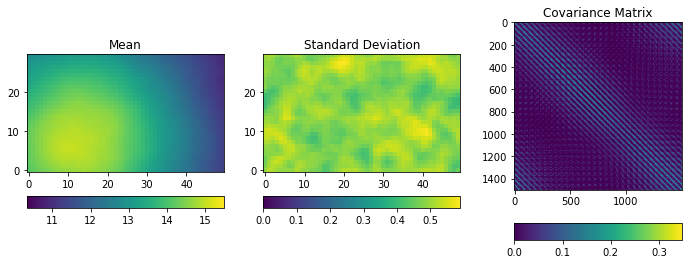

In [4]:
prior_args = Statistics.prior_args_from_file(timestamp)
statistics.set_prior(prior_args)

statistics.plot()

## Loading observations 

Observation positions which are fixed for a setup and values from the truth

In [5]:
obs_timestamp = "2021_08_11-14_10_37"
observation = Observation.from_file(grid, timestamp, obs_timestamp)

Remember to set observation positions and to set/observe values!


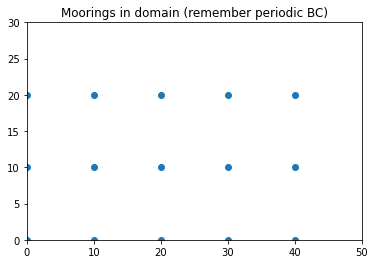

In [6]:
observation.plot_positions()

## LETKF filtering

Updating/conditioning the distributions at every observation time

In [7]:
letkFilter = LETKalmanFilter.LETKalman(statistics, observation, 5)

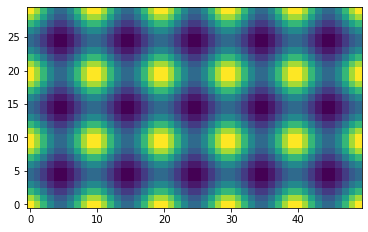

In [8]:
from matplotlib import pyplot as plt
plt.imshow(letkFilter.W_analysis, origin="lower")

In [9]:
from matplotlib import pyplot as plt 
import numpy as np

In [10]:
statistics.set_prior(prior_args)
statistics.propagate(25)

In [11]:
X_f = statistics.ensemble.ensemble

In [12]:
d = 13

L = letkFilter.all_Ls[13]

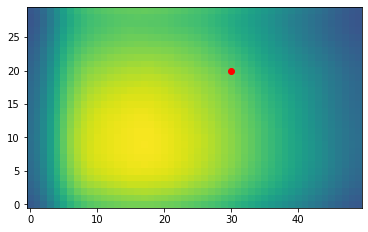

In [13]:
plt.imshow(np.reshape(np.average(X_f, axis=1), (grid.ny,grid.nx)), origin="lower", vmin=10, vmax=15)

plt.scatter(letkFilter.observation_positions[d][0]/grid.dx, letkFilter.observation_positions[d][1]/grid.dy, c ="red")

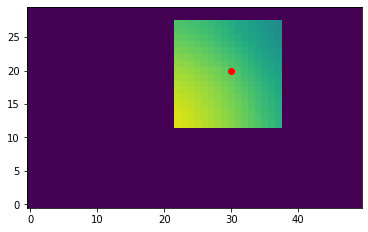

In [14]:
plt.imshow(np.reshape(np.average(X_f, axis=1), (grid.ny,grid.nx))*1.0*L, origin="lower", vmin=10, vmax=15)

plt.scatter(letkFilter.observation_positions[d][0]/grid.dx, letkFilter.observation_positions[d][1]/grid.dy, c ="red")

In [15]:
observation.obses[0][d]

13.995845880558395

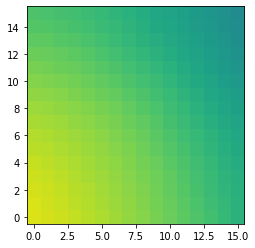

In [16]:
X_f_loc = np.reshape(statistics.ensemble.ensemble, (grid.ny, grid.nx, 100))[L,:]
X_f_loc_mean = np.average(X_f_loc, axis=1)
X_f_loc_pert = X_f_loc - np.reshape(X_f_loc_mean, (256,1))
plt.imshow(np.reshape(X_f_loc_mean,(16,16)), origin="lower", vmin=10, vmax=15)

In [17]:
HX_f_d = (observation.H @ X_f)[d]
H_idx = np.where(np.sum(X_f_loc == HX_f_d, axis=1) > 0)[0][0]

In [18]:
H_loc = np.zeros((1,256))
H_loc[0,H_idx] = 1

In [19]:
HX_f_loc = H_loc @ X_f_loc

In [20]:
HX_f_loc_mean = np.average(HX_f_loc)
print(HX_f_loc_mean)
HX_f_loc_pert = HX_f_loc - HX_f_loc_mean
print(HX_f_loc_pert.shape)

13.686754839695745
(1, 100)


In [21]:
P = np.linalg.inv(HX_f_loc_pert.T @ np.linalg.inv(np.reshape(observation.R[d,d], (1,1))) @ HX_f_loc_pert + (100-1)*np.eye(100))
P

array([[ 9.97291918e-03,  7.99452287e-05,  1.77958288e-04, ...,
        -2.92620166e-04,  1.13122184e-04, -3.24588162e-05],
       [ 7.99452287e-05,  1.00511140e-02, -1.11068889e-04, ...,
         1.82632667e-04, -7.06028106e-05,  2.02584813e-05],
       [ 1.77958288e-04, -1.11068889e-04,  9.85377046e-03, ...,
         4.06540794e-04, -1.57162041e-04,  4.50954324e-05],
       ...,
       [-2.92620166e-04,  1.82632667e-04,  4.06540794e-04, ...,
         9.43252741e-03,  2.58424505e-04, -7.41512693e-05],
       [ 1.13122184e-04, -7.06028106e-05, -1.57162041e-04, ...,
         2.58424505e-04,  1.00011074e-02,  2.86656713e-05],
       [-3.24588162e-05,  2.02584813e-05,  4.50954324e-05, ...,
        -7.41512693e-05,  2.86656713e-05,  1.00927849e-02]])

In [22]:
K = np.reshape(X_f_loc_pert @ P @ HX_f_loc_pert.T @ np.linalg.inv(np.reshape(observation.R[d,d], (1,1))), 256)
K

array([0.17558088, 0.22813074, 0.2907865 , 0.33348289, 0.41026725,
       0.45217277, 0.49045498, 0.51832167, 0.54555343, 0.55491312,
       0.53016072, 0.49051948, 0.45342532, 0.40038186, 0.33853818,
       0.28484102, 0.24198303, 0.29506019, 0.34299573, 0.39725792,
       0.46406267, 0.50528567, 0.54373361, 0.59885551, 0.62173201,
       0.61713017, 0.57275736, 0.52831552, 0.48365838, 0.42597259,
       0.36090791, 0.3149358 , 0.27458144, 0.32614007, 0.37477568,
       0.45024591, 0.51061411, 0.55812002, 0.61719366, 0.66525103,
       0.68605741, 0.6664495 , 0.62012015, 0.55666255, 0.49925475,
       0.45005517, 0.41073395, 0.35173405, 0.29579631, 0.34420474,
       0.4073228 , 0.48726222, 0.57053668, 0.64200546, 0.71070687,
       0.74142389, 0.74965604, 0.72574584, 0.66329071, 0.60160786,
       0.53831725, 0.48482098, 0.43533306, 0.39156029, 0.30904577,
       0.35837975, 0.44927937, 0.53909151, 0.62563567, 0.72140219,
       0.79425523, 0.82027587, 0.81950708, 0.77073   , 0.71625

In [23]:
D = observation.obses[0][d] - HX_f_loc_mean
D

0.3090910408626506

In [24]:
X_a_loc_mean = X_f_loc_mean + K * D

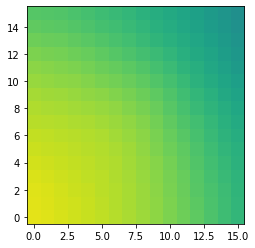

In [25]:
plt.imshow(np.reshape(X_a_loc_mean,(16,16)), origin="lower", vmin=10, vmax=15)

In [26]:
H_loc @ X_a_loc_mean

array([13.97418716])

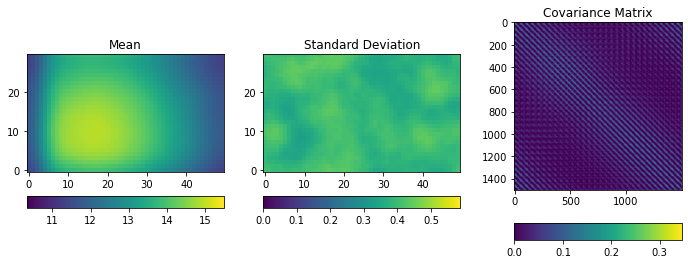

In [27]:
statistics.plot()

In [28]:
letkFilter = LETKalmanFilter.LETKalman(statistics,observation,5)

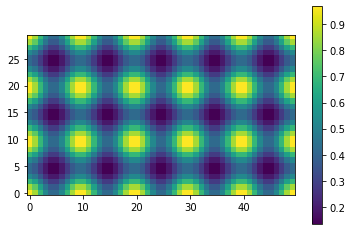

In [29]:
plt.imshow(letkFilter.W_analysis, origin="lower")
plt.colorbar()

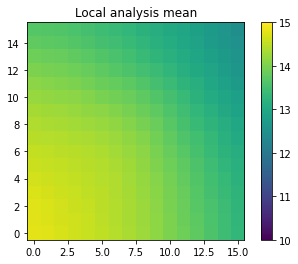

In [30]:
test = letkFilter.filter(statistics.ensemble.ensemble, observation.obses[0])

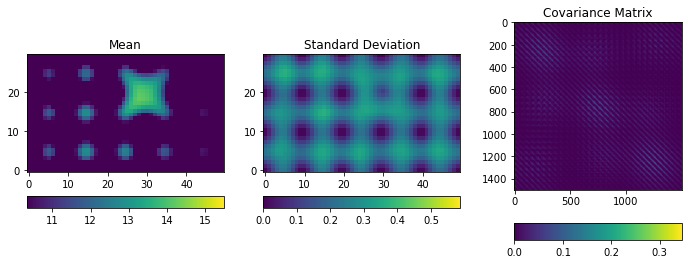

In [31]:
statistics.plot()